In [77]:
from typing import TypedDict, Union
from langgraph.graph import StateGraph, START, END

In [78]:
class AgentState(TypedDict):
    number1: int
    number2: int
    operation1: str
    final1: int
    number3: int
    number4: int
    operation2: str
    final2: int


In [79]:
def addition_node_01(state: AgentState) -> AgentState:
    """Performs addion operation"""
    state['final1'] = state['number1'] + state['number2']
    return state

def substraction_node_01(state: AgentState) -> AgentState:
    """Performs substraction operation"""
    state['final1'] = state['number1'] - state['number2']
    return state

def next_node_decider_01(state: AgentState) -> Union[AgentState, str]:
    if state['operation1'] == '+':
        return "plus"
    elif state['operation1'] == '-':
        return "minus"
    else:
        return "oops"

def addition_node_02(state: AgentState) -> AgentState:
    """Performs addion operation"""
    state['final2'] = state['number3'] + state['number3']
    return state

def substraction_node_02(state: AgentState) -> AgentState:
    """Performs substraction operation"""
    state['final2'] = state['number3'] - state['number4']
    return state

def next_node_decider_02(state: AgentState) -> Union[AgentState, str]:
    if state['operation2'] == '+':
        return "plus"
    elif state['operation2'] == '-':
        return "minus"
    else:
        return "oops"

In [80]:
graph = StateGraph(AgentState)

graph.add_node("adder1", addition_node_01)
graph.add_node("substractor1", substraction_node_01)
graph.add_node("router1", lambda state: state)

graph.add_node("adder2", addition_node_02)
graph.add_node("substractor2", substraction_node_02)
graph.add_node("router2", lambda state: state)


graph.add_edge(START, "router1")

graph.add_conditional_edges(
    "router1", 
    next_node_decider_01,
    {
        "plus": "adder1",
        "minus" : "substractor1"
    })

graph.add_edge("adder1", "router2")
graph.add_edge("substractor1", "router2")


graph.add_conditional_edges(
    "router2", 
    next_node_decider_02,
    {
        "plus": "adder2",
        "minus" : "substractor2"
    })

graph.add_edge("adder2", END)
graph.add_edge("substractor2", END)

app = graph.compile()

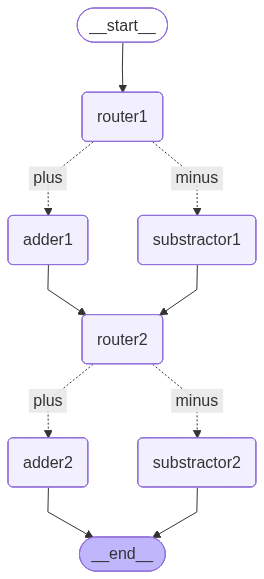

In [81]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [82]:
plus_state = {"number1": 10, "operation1": "+", "number2": 5, "number3": 10, "operation2": "-", "number4": 5}
plus_result = app.invoke(plus_state)
plus_result

{'number1': 10,
 'number2': 5,
 'operation1': '+',
 'final1': 15,
 'number3': 10,
 'number4': 5,
 'operation2': '-',
 'final2': 5}

In [83]:
minus_state = {"number1": 10, "operation1": "-", "number2": 5, "number3": 10, "operation2": "-", "number4": 5}
minus_result = app.invoke(minus_state)
minus_result

{'number1': 10,
 'number2': 5,
 'operation1': '-',
 'final1': 5,
 'number3': 10,
 'number4': 5,
 'operation2': '-',
 'final2': 5}